# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 30.96, 即時現金賣出: 31.63


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [5]:
URL = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url=URL)
pd.DataFrame(pd.read_html(resp.text)[0])

幣別                        現金匯率          \
                        幣別 Unnamed: 1_level_1     本行買入    本行賣出   
0       美金 (USD)  美金 (USD)             27.535   28.205   27.86   
1       港幣 (HKD)  港幣 (HKD)              3.442    3.646   3.563   
2       英鎊 (GBP)  英鎊 (GBP)              38.27    40.39  39.165   
3       澳幣 (AUD)  澳幣 (AUD)              21.19    21.97  21.405   
4   加拿大幣 (CAD)  加拿大幣 (CAD)              22.67    23.58      23   
5   新加坡幣 (SGD)  新加坡幣 (SGD)              20.44    21.35   20.91   
6   瑞士法郎 (CHF)  瑞士法郎 (CHF)               30.3     31.5   30.91   
7       日圓 (JPY)  日圓 (JPY)             0.2472     0.26  0.2542   
8     南非幣 (ZAR)  南非幣 (ZAR)                  -        -   1.951   
9     瑞典幣 (SEK)  瑞典幣 (SEK)               2.97     3.49     3.3   
10      紐元 (NZD)  紐元 (NZD)              19.58    20.43   19.91   
11      泰幣 (THB)  泰幣 (THB)             0.7633   0.9533  0.8727   
12  菲國比索 (PHP)  菲國比索 (PHP)             0.5078   0.6408       -   
13    印尼幣 (IDR)  印尼幣 (IDR)            0.00158  0.00228       -   
14      歐元 (EUR)  歐元 (EUR)              33.31    34.65  33.825   
15      韓元 (KRW)  韓元 (KRW)            0.02306  0.02696       -   
16    越南盾 (VND)  越南盾 (VND)            0.00082  0.00132       -   
17    馬來幣 (MYR)  馬來幣 (MYR)              5.624    7.249       -   
18    人民幣 (CNY)  人民幣 (CNY)              4.251    4.413   4.318   

   Unnamed: 4_level_0 即期匯率                    Unnamed: 7_level_0     遠期匯率  \
                 本行買入 本行賣出 Unnamed: 6_level_1               本行買入     遠期匯率   
0               28.01   查詢                 查詢             27.535   28.205   
1               3.633   查詢                 查詢              3.442    3.646   
2              39.795   查詢                 查詢              38.27    40.39   
3               21.75   查詢                 查詢              21.19    21.97   
4               23.33   查詢                 查詢              22.67    23.58   
5               21.13   查詢                 查詢              20.44    21.35   
6                31.3   查詢                 查詢               30.3     31.5   
7              0.2588   查詢                 查詢             0.2472     0.26   
8               2.041   查詢                 查詢                  -        -   
9                3.42   查詢                 查詢               2.97     3.49   
10              20.21   查詢                 查詢              19.58    20.43   
11             0.9187   查詢                 查詢             0.7633   0.9533   
12                  -   查詢                 查詢             0.5078   0.6408   
13                  -   查詢                 查詢            0.00158  0.00228   
14             34.425   查詢                 查詢              33.31    34.65   
15                  -   查詢                 查詢            0.02306  0.02696   
16                  -   查詢                 查詢            0.00082  0.00132   
17                  -   查詢                 查詢              5.624    7.249   
18              4.378   查詢                 查詢              4.251    4.413   

      歷史匯率           現金匯率        Unnamed: 13_level_0                即期匯率  \
      歷史匯率    本行賣出 本行買入.1 本行賣出.1 Unnamed: 13_level_1 Unnamed: 14_level_1   
0    27.86   28.01    NaN    NaN                 NaN                 NaN   
1    3.563   3.633    NaN    NaN                 NaN                 NaN   
2   39.165  39.795    NaN    NaN                 NaN                 NaN   
3   21.405   21.75    NaN    NaN                 NaN                 NaN   
4       23   23.33    NaN    NaN                 NaN                 NaN   
5    20.91   21.13    NaN    NaN                 NaN                 NaN   
6    30.91    31.3    NaN    NaN                 NaN                 NaN   
7   0.2542  0.2588    NaN    NaN                 NaN                 NaN   
8    1.951   2.041    NaN    NaN                 NaN                 NaN   
9      3.3    3.42    NaN    NaN                 NaN                 NaN   
10   19.91   20.21    NaN    NaN                 NaN                 NaN   
11  0.8727  0.9187    NaN    Na

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

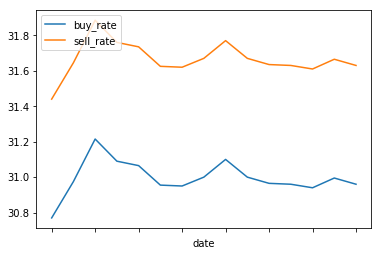

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [7]:
URL = 'https://rate.bot.com.tw/xrt/quote/ltm/JPY'
resp = requests.get(url=URL)
pd.read_html(resp.text)[0]

掛牌日期                幣別    現金匯率         Unnamed: 5_level_0  \
          掛牌日期      本行買入      幣別    本行賣出    本行買入               本行賣出   
0   2021/05/24  日圓 (JPY)  0.2476  0.2604  0.2549             0.2589   
1   2021/05/21  日圓 (JPY)  0.2476  0.2604  0.2549             0.2589   
2   2021/05/20  日圓 (JPY)  0.2476  0.2604  0.2549             0.2589   
3   2021/05/19  日圓 (JPY)  0.2472  0.2600  0.2545             0.2585   
4   2021/05/18  日圓 (JPY)  0.2472  0.2600  0.2545             0.2585   
..         ...       ...     ...     ...     ...                ...   
68  2021/02/05  日圓 (JPY)  0.2596  0.2724  0.2669             0.2709   
69  2021/02/04  日圓 (JPY)  0.2603  0.2731  0.2676             0.2716   
70  2021/02/03  日圓 (JPY)  0.2606  0.2734  0.2679             0.2719   
71  2021/02/02  日圓 (JPY)  0.2610  0.2738  0.2683             0.2723   
72  2021/02/01  日圓 (JPY)  0.2615  0.2743  0.2688             0.2728   

                 即期匯率                    Unnamed: 8_level_0  
   Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1  
0                 NaN                NaN                NaN  
1                 NaN                NaN                NaN  
2                 NaN                NaN                NaN  
3                 NaN                NaN                NaN  
4                 NaN                NaN                NaN  
..                ...                ...                ...  
68                NaN                NaN                NaN  
69                NaN                NaN                NaN  
70                NaN                NaN                NaN  
71                NaN                NaN                NaN  
72                NaN                NaN                NaN  

[73 rows x 9 columns]

In [11]:
Mdf = pd.DataFrame()
for i in ['EUR', 'CNY', 'JPY']:
    URL = 'https://rate.bot.com.tw/xrt/quote/ltm/{}'.format(i)
    resp = requests.get(url=URL)
    df = pd.DataFrame(pd.read_html(resp.text)[0], )
    Mdf = pd.concat([Mdf, df], axis = 0)

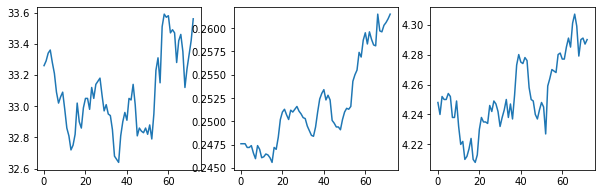

In [66]:
plt.figure(figsize=[10,3])

plt.subplot(1,3,1)
plt.plot(Mdf.iloc[:,0:5][(Mdf.iloc[:,1] == '歐元 (EUR)')].iloc[:,2])

plt.subplot(1,3,2)
plt.plot(Mdf.iloc[:,0:5][(Mdf.iloc[:,1] == '日圓 (JPY)')].iloc[:,2])

plt.subplot(1,3,3)
plt.plot(Mdf.iloc[:,0:5][(Mdf.iloc[:,1] == '人民幣 (CNY)')].iloc[:,2])
